In [1]:
import pandas as pd

## Carregando os Dados

In [2]:
# Carrega o dataset de escolas
dados_escolas = pd.read_csv("/content/dataset_escolas.csv")

In [3]:
# Shape
dados_escolas.shape

(15, 5)

In [4]:
# Visualizando as 5 primeiras linhas
dados_escolas.head()

,ID_Escola,Nome_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Escola A,Publica,2917,1910635
1,1,Escola B,Publica,2949,1884411
2,2,Escola C,Particular,1761,1056600
3,3,Escola D,Publica,4635,3022020
4,4,Escola E,Particular,1468,917500


In [5]:
# Dataset de estudantes
dados_estudantes = pd.read_csv("/content/dataset_estudantes.csv")

In [6]:
# Metodo Shape
dados_estudantes.shape

(27027, 7)

In [7]:
# Visualizando dataset
dados_estudantes.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica
0,0,Kevin Bradley,M,6,Escola A,66,79.0
1,1,Paul Smith,M,9,Escola A,94,61.0
2,2,John Rodriguez,M,9,Escola A,90,60.0
3,3,Oliver Scott,M,9,Escola A,67,58.0
4,4,William Ray,F,6,Escola A,97,84.0


In [30]:
# Combina os datasets
dados_full = pd.merge(dados_estudantes, dados_escolas, how = "left", on = ["Nome_Escola", "Nome_Escola"])

In [9]:
# Shape
dados_full.shape

(27027, 11)

In [10]:
dados_full.head()

,ID_Estudante,Nome_Estudante,Genero,Serie,Nome_Escola,Nota_Redacao,Nota_Matematica,ID_Escola,Tipo_Escola,Numero_Alunos,Orcamento_Anual
0,0,Kevin Bradley,M,6,Escola A,66,79.0,0,Publica,2917,1910635
1,1,Paul Smith,M,9,Escola A,94,61.0,0,Publica,2917,1910635
2,2,John Rodriguez,M,9,Escola A,90,60.0,0,Publica,2917,1910635
3,3,Oliver Scott,M,9,Escola A,67,58.0,0,Publica,2917,1910635
4,4,William Ray,F,6,Escola A,97,84.0,0,Publica,2917,1910635


In [12]:
# Séries escolares no dataset (do 6 ao 9 ano)
dados_full["Serie"].unique()

array([6, 9, 8, 7])

In [13]:
# Genero
dados_full["Genero"].unique()

array(['M', 'F'], dtype=object)

##  Análise de Dados



> **1- Temos dados de quantas escolas?**

In [14]:
dados_full['Nome_Escola'].nunique()

12

> **2- Qual o total de registros de estudantes na base de dados?**

In [15]:
dados_full['ID_Estudante'].shape

(27027,)

> **3- Qual o orçamento total considerando todas as escolas?**

In [16]:
orcamento_total = dados_full['Orcamento_Anual'].sum()
orcamento_total


53999349530

> **4- Qual a média da nota dos alunos em Redação?**

In [17]:
dados_full['Nota_Redacao'].mean()

82.16712916712916

> **5- Qual a média da nota dos alunos em Matemática?**

In [18]:
dados_full['Nota_Matematica'].mean()

79.49766891141863

> **6- Considerando que a nota de aprovação é 70, quantos alunos foram aprovados em Redação? (Entregue o resultado em valor absoluto e percentual)**

In [19]:
dados_full.query('Nota_Redacao >= 70').shape[0]

23564

In [20]:
dados_full.query('Nota_Redacao >= 70').shape[0]/dados_full.shape[0]*100

87.18688718688719

> **7- Considerando que a nota de aprovação é 70, quantos alunos foram aprovados em Matemática? (Entregue o resultado em valor absoluto e percentual)**

In [21]:
dados_full.query('Nota_Matematica >= 70').shape[0]

20845

In [22]:
dados_full.query('Nota_Matematica >= 70').shape[0]/dados_full.shape[0]*100

77.12657712657712

> **8- Considerando que a nota de aprovação é 70, quantos alunos foram aprovados em Matemática e Redação? (Entregue o resultado em valor absoluto e percentual)**

In [23]:
dados_full.query('Nota_Matematica >= 70' and 'Nota_Redacao').shape[0]

27027

In [24]:
dados_full.query('Nota_Matematica >= 70' and 'Nota_Redacao >=70').shape[0]/dados_full.shape[0]*100

87.18688718688719

In [25]:
#Aprovação em matemática por genero
aprovados_genero_matematica = dados_full[(dados_full['Nota_Matematica'] >=70)]["Genero"].value_counts()
aprovados_genero_matematica

F    10487
M    10358
Name: Genero, dtype: int64

In [26]:
# Verificando quantas escolas tem na base de dados
dados_escolas['Tipo_Escola'].value_counts()

Particular    8
Publica       7
Name: Tipo_Escola, dtype: int64

In [27]:
# Contando o numero de estudantes para cada escola
total_estudantes_por_escola = dados_full['Nome_Escola'].value_counts().sort_values()
total_estudantes_por_escola

Escola I     427
Escola J     962
Escola L     991
Escola E    1468
Escola C    1761
Escola K    1800
Escola G    1858
Escola F    2283
Escola A    2917
Escola B    2949
Escola D    4635
Escola H    4976
Name: Nome_Escola, dtype: int64

In [32]:
# Orçamento por cada escola
orcamento_por_escola = dados_full.groupby(['Nome_Escola']).mean()['Orcamento_Anual'].sort_values()
orcamento_por_escola

<ipython-input-32-23f8306014e1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orcamento_por_escola = dados_full.groupby(['Nome_Escola']).mean()['Orcamento_Anual'].sort_values()


Nome_Escola
Escola I     248087.0
Escola J     585858.0
Escola E     917500.0
Escola K    1049400.0
Escola C    1056600.0
Escola G    1081356.0
Escola F    1319574.0
Escola B    1884411.0
Escola A    1910635.0
Escola L    2547363.0
Escola D    3022020.0
Escola H    3124928.0
Name: Orcamento_Anual, dtype: float64

In [33]:
# Orçamento per capita (por estudante)
orcamento_per_capita = (orcamento_por_escola/total_estudantes_por_escola).sort_values()
orcamento_per_capita

Escola F     578.000000
Escola I     581.000000
Escola G     582.000000
Escola K     583.000000
Escola C     600.000000
Escola J     609.000000
Escola E     625.000000
Escola H     628.000000
Escola B     639.000000
Escola D     652.000000
Escola A     655.000000
Escola L    2570.497477
dtype: float64

In [34]:
dados_full.columns

Index(['ID_Estudante', 'Nome_Estudante', 'Genero', 'Serie', 'Nome_Escola',
       'Nota_Redacao', 'Nota_Matematica', 'ID_Escola', 'Tipo_Escola',
       'Numero_Alunos', 'Orcamento_Anual'],
      dtype='object')

In [37]:
# Media por escolas dos alunos aprovados em Redação
media_por_escola_R = dados_full.groupby(['Nome_Escola']).mean()['Nota_Redacao'].sort_values()
media_por_escola_R

<ipython-input-37-9b43c1b491ea>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_por_escola_R = dados_full.groupby(['Nome_Escola']).mean()['Nota_Redacao'].sort_values()


Nome_Escola
Escola D    80.934412
Escola L    80.940464
Escola H    81.033963
Escola B    81.158020
Escola A    81.182722
Escola C    83.725724
Escola I    83.814988
Escola E    83.816757
Escola K    83.955000
Escola G    83.975780
Escola F    83.989488
Escola J    84.044699
Name: Nota_Redacao, dtype: float64

In [38]:
# Media por escolas dos alunos aprovados em Matemática
media_por_escola_M = dados_full.groupby(['Nome_Escola']).mean()['Nota_Matematica'].sort_values()
media_por_escola_M

<ipython-input-38-cc8b2b930684>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  media_por_escola_M = dados_full.groupby(['Nome_Escola']).mean()['Nota_Matematica'].sort_values()


Nome_Escola
Escola A    76.629414
Escola B    76.711767
Escola H    77.048432
Escola L    77.228283
Escola D    77.289752
Escola G    83.061895
Escola F    83.274201
Escola E    83.351499
Escola C    83.359455
Escola K    83.682222
Escola I    83.803279
Escola J    83.839917
Name: Nota_Matematica, dtype: float64

<ipython-input-39-260850124b46>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orcamento_por_escola = dados_full.groupby(['Nome_Escola']).mean()['Orcamento_Anual'].sort_values()


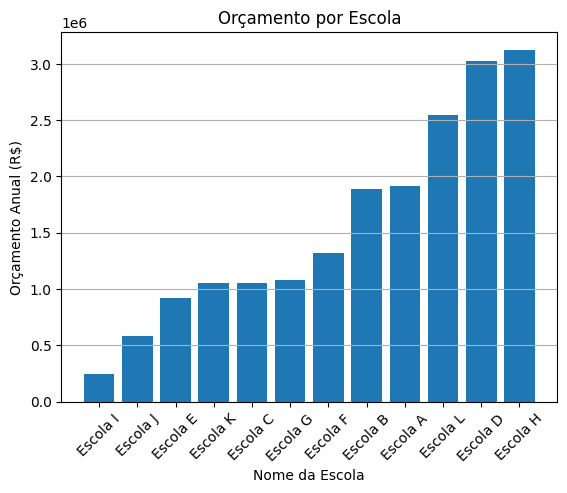

In [39]:
import matplotlib.pyplot as plt

# Ordena os valores do orçamento por escola
orcamento_por_escola = dados_full.groupby(['Nome_Escola']).mean()['Orcamento_Anual'].sort_values()

# Cria o gráfico de barras
plt.bar(orcamento_por_escola.index, orcamento_por_escola)
plt.xlabel('Nome da Escola')
plt.ylabel('Orçamento Anual (R$)')
plt.title('Orçamento por Escola')

# Adiciona labels e formatação
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostra o gráfico
plt.show()


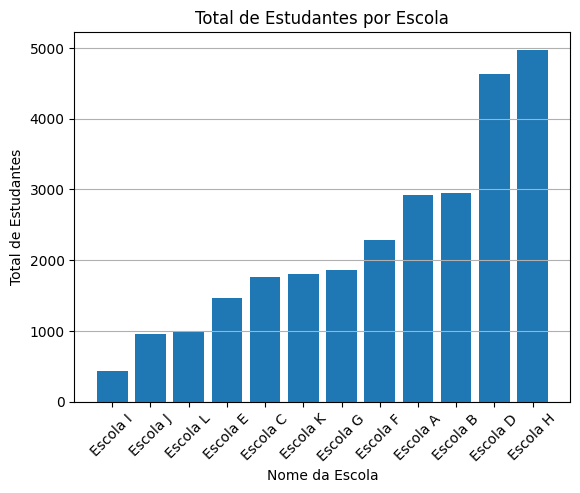

In [40]:
import matplotlib.pyplot as plt

# Cria o gráfico de barras
plt.bar(total_estudantes_por_escola.index, total_estudantes_por_escola)
plt.xlabel('Nome da Escola')
plt.ylabel('Total de Estudantes')
plt.title('Total de Estudantes por Escola')

# Adiciona labels e formatação
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostra o gráfico
plt.show()
